# Problem Statement

- See 2.4-mainWithGoalAndNotes.ipynb

# TODO

- [x] Load Data

- [x] (2.1.12) **Estimate the ACov @ lag k :** $ \hat{\gamma}_{k} $ (gamma hat) = 1/N * $ \sum_{t=1}^{N - k} (z_{t} - \bar{z})(z_{t+k} - \bar{z}) $ k = 0, 1, 2,..., K

- [x] (2.1.12) Set : $ c_k $ = $ \hat{\gamma}_{k} $

- [x] (2.1.11) **Estimate the ACor @ lag k :** $ \hat{\rho}{_k} $ (rho hat) = $ c_k $ / $ c_0 $

- [x] (2.1.11) Set : $ r_k $ to  $ \hat{\rho}{_k} $

- [x] Graph $ r_k $

---

In [1]:
import numpy as np
import pandas as pd

## Load Data

In [2]:
BASE = '/Users/brinkley97/Documents/development/'
path_to_dataset = 'book-forecasting_and_control_by_4_Gs/datasets/'

In [3]:
# lew
lew_dataset = "lewDataset.csv"
lew = BASE + path_to_dataset + lew_dataset

# data = pd.read_csv(lew)
# data = pd.DataFrame([1, 2, 3], columns=["measurements"])
# data

In [5]:
irvine_blood_sugar_dataset = "irvinePrePostMeals.csv"
irvine_pre_post_meals = BASE + path_to_dataset + irvine_blood_sugar_dataset

data = pd.read_csv(irvine_pre_post_meals)
data

DateTimeIndex  Value
0    1991-04-21 09:09:00    100
1    1991-04-21 17:08:00    119
2    1991-04-22 07:35:00    216
3    1991-04-22 16:56:00    211
4    1991-04-23 07:25:00    257
..                   ...    ...
286  1991-09-01 09:02:00    183
287  1991-09-01 17:41:00    249
288  1991-09-02 08:51:00    168
289  1991-09-02 17:30:00     61
290  1991-09-03 07:20:00    110

[291 rows x 2 columns]

In [44]:
z = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 
        202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 
        207, 206, 200, 203, 203, 200, 200, 195, 202, 204, 207, 206, 200]
# z = data['measurements']
# z = data['Value']

In [45]:

N = len(z)
ks = range(0, N)
zbar = np.mean(z)
z, ks, zbar

([200,
  202,
  208,
  204,
  204,
  207,
  207,
  204,
  202,
  199,
  201,
  198,
  200,
  202,
  203,
  205,
  207,
  211,
  204,
  206,
  203,
  203,
  201,
  198,
  200,
  206,
  207,
  206,
  200,
  203,
  203,
  200,
  200,
  195,
  202,
  204,
  207,
  206,
  200],
 range(0, 39),
 203.02564102564102)

## Estimate AutoCov @ lag k

In [46]:
def est_autocov(data, lag_k, sample_mean): 
    """
    Calculate the estimated autocovariance
    
    :param data: numerical values in data
    :param lag_k: a list of k values
    :param sample_mean: mean of the data
    :return: a list of tuples (ck idex, ck float value)
    
    """
    
    gamma_k = 0
    
    N = len(data)
    for t in range(N - lag_k):
        # print(t, lag_k)
        # when we have a new index of lag_k, hence 0, 1, ..., K
        t_sm = (data[t] - sample_mean)
        # print(t_sm)
        tk_sm = data[t + lag_k] - sample_mean
        # print(tk_sm)
        gamma_k += t_sm * tk_sm
        # print(gamma_k)
        # print()
        
        # print("gamma_k : ", gamma_k)
    return lag_k, gamma_k/N

In [47]:
c_ks = []

for i in range(len(ks)): 
    c_ks.append(est_autocov(z, ks[i], zbar))
    
c_ks

[(0, 10.742932281393824),
 (1, 5.021021932264538),
 (2, 1.2787302550616158),
 (3, -1.4589591867698377),
 (4, -2.560225222947118),
 (5, -2.816652337362398),
 (6, -5.050068274920344),
 (7, -3.97250459380637),
 (8, -1.6405030428699072),
 (9, 1.5895918676983765),
 (10, 3.9459195198840167),
 (11, 3.0195384278224506),
 (12, 1.4541040813230157),
 (13, 0.0701293008985326),
 (14, -0.7234444275864385),
 (15, -0.5459464926920534),
 (16, -3.1376793270284375),
 (17, -2.1620222862826406),
 (18, -1.105497395438223),
 (19, 0.9464252600347279),
 (20, 2.232404457256528),
 (21, 1.1304809588833256),
 (22, 1.469057131779024),
 (23, 1.316509044319694),
 (24, 1.0324685176756176),
 (25, -0.8156745730710235),
 (26, -2.0195047118124054),
 (27, -1.5829666717240694),
 (28, -1.0714779413004272),
 (29, -0.3311923666953255),
 (30, 0.12769938805441775),
 (31, -0.07810313727473475),
 (32, 0.4333855931489071),
 (33, 0.6391544024680124),
 (34, 0.5595846187562171),
 (35, 0.12367032485375742),
 (36, -0.7724675061953165),


## Estimate AutoCor @ lag k

In [48]:
def est_autocor(data, lag_k, sample_mean):
    c_k = est_autocov(data, lag_k, sample_mean)
    # print("\nc_k : ", c_k[1])
    cnot = est_autocov(data, 0, sample_mean)
    # print("cnot : ", cnot[1])
    rho_hat_k = np.divide(c_k[1], cnot[1])
    # print("rho_hat_k : ", rho_hat_k)
    return lag_k, np.round(rho_hat_k, 2)

In [49]:
r_ks = []

for k in range(len(ks)):
    # print("k : ", k)
    r_ks.append(est_autocor(z, k, zbar))
r_ks

[(0, 1.0),
 (1, 0.47),
 (2, 0.12),
 (3, -0.14),
 (4, -0.24),
 (5, -0.26),
 (6, -0.47),
 (7, -0.37),
 (8, -0.15),
 (9, 0.15),
 (10, 0.37),
 (11, 0.28),
 (12, 0.14),
 (13, 0.01),
 (14, -0.07),
 (15, -0.05),
 (16, -0.29),
 (17, -0.2),
 (18, -0.1),
 (19, 0.09),
 (20, 0.21),
 (21, 0.11),
 (22, 0.14),
 (23, 0.12),
 (24, 0.1),
 (25, -0.08),
 (26, -0.19),
 (27, -0.15),
 (28, -0.1),
 (29, -0.03),
 (30, 0.01),
 (31, -0.01),
 (32, 0.04),
 (33, 0.06),
 (34, 0.05),
 (35, 0.01),
 (36, -0.07),
 (37, -0.01),
 (38, 0.02)]

# Graph AutoCor

In [50]:
import matplotlib.pyplot as plt

In [51]:
def line_plot(x, y):
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=3.0)

In [57]:
def autocor_plot(x, y, max_lags):
    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.xcorr(x, y, maxlags=ks[max_lags], usevlines = True, normed = True, lw=2)
    ax1.grid(True)

    # ks x-axis; pho_k = -pho_k
    ax2.acorr(y, maxlags=ks[max_lags], usevlines = True, normed = True, lw=2)
    ax2.grid(True)
    
    # plt.title("Autocorrelation")
    plt.xlabel('k Lags')
    
    plt.ylabel('Autocorrelation')
    
    plt.xlim([0, max_lags])


In [58]:
def graph_est_autocor(x, y, r_ks, len_rks):
    
    max_lags = 10
    
    for idx in range(len_rks):
        x.append(r_ks[idx][0])
        # print("x : ", x)
        y.append(r_ks[idx][1])
        # print("y : ", y, "\n")    
    
    return line_plot(x, y), autocor_plot(x, y, max_lags)

(None, None)

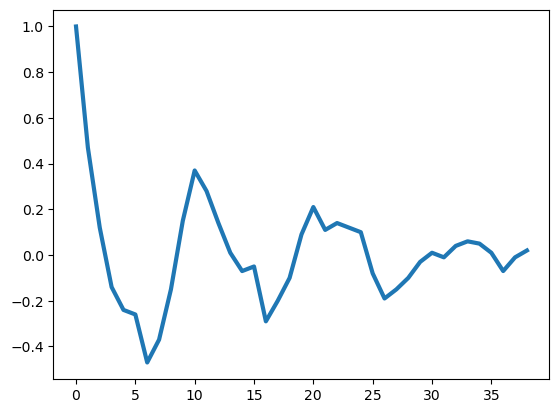

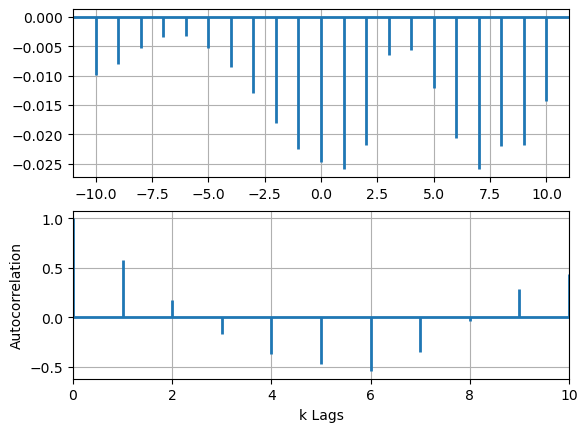

In [59]:
lags = []
autocor = []
len_rks = len(r_ks)
graph_est_autocor(lags, autocor, r_ks, len_rks)